In [5]:
# a display function. irrelevant
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:95% !important; } div.output_wrapper .output { padding-left: 14px; }</style>"))

# Taskforce Primer - commonly used functions and methods

In [3]:
# import libraries
import lime
import sklearn
import pandas as pd
import lime.lime_tabular
import numpy as np
import shap
import seaborn as sns
import pyodbc # for reading mdf files

import matplotlib.pyplot as plt

## Loading .parquet, .csv and .mdf files

In [137]:
# loading .csv files
titanic_train = pd.read_csv("data/titanic/train.csv")
titanic_test = pd.read_csv("data/titanic/test.csv")

## loading .parquet files
# df = pd.read_parquet('transmission_sp18_egs.parquet')

# loading .mdf files

cnxn_str = (
    r'DRIVER=ODBC Driver 11 for SQL Server;'
    r'SERVER=(local)\SQLEXPRESS;'
    r'Trusted_Connection=yes;'
    r'AttachDbFileName=C:\Users\...\zzz.mdf;'
)
cnxn = pyodbc.connect(cnxn_str)
df = pd.read_sql("SELECT * FROM Table1", cnxn)

In [43]:
# basic data exploration functions
print(titanic_train.head())
print(titanic_train.tail())
print(titanic_train.describe())
print(titanic_train.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

# Handling duplicates

In [45]:
titanic_train.shape

(891, 12)


In [57]:
# add duplicates here
new_titanic = titanic_train.append([titanic_train.iloc[0:5, :]]*5,ignore_index=True)
print(new_titanic.shape)

(916, 12)


### Identifying whether any duplicates are present

In [71]:
print(f"This data contains duplicates and this expression equates to: {len(new_titanic.PassengerId.value_counts()) == new_titanic.shape[0]}")
# this tests whether the dataframe has any duplicate rows. If true, then some data is duplicated

This data contains duplicates and this expression equates to: False


In [70]:
print(f"There are no duplicates in this data and THIS expression equates to: {len(titanic_train.PassengerId.value_counts()) == titanic_train.shape[0]}")

There are no duplicates in this data and THIS expression equates to: True


In [66]:
print(f"There are no duplicates in this data and THIS expression equates to: {len(titanic_train.PassengerId) == len(set(titanic_train.PassengerId))}")

There are no duplicates in this data and THIS expression equates to: True


In [69]:
print(f"This data contains duplicates and this expression equates to: {len(new_titanic.PassengerId) == len(set(new_titanic.PassengerId))}")

This data contains duplicates and this expression equates to: False


### Removing duplicates

In [56]:
#new_titanic.drop_duplicates(subset = ["PassengerId"], inplace = True)
new_titanic.drop_duplicates(subset = ["PassengerId"])
#new_titanic.shape

(891, 12)

In [50]:
# An alternative method
new_titanic = new_titanic[~new_titanic.PassengerId.duplicated(keep='first')]
new_titanic.shape
# ~ reverses the mask. So it turns everything that was True False and vice-versa. 
# In this case, that means that we will select out the ones that are not duplicated according to the method.

(891, 12)

## Univariate analysis
https://en.wikipedia.org/wiki/Univariate_analysis

Univariate analysis is the simplest form of data analysis. Only one variable is being analysed. Since it's a single variable, it doesn't deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.
Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate, i.e. when the analysed variable is dependent on other variables.

### Bar Charts

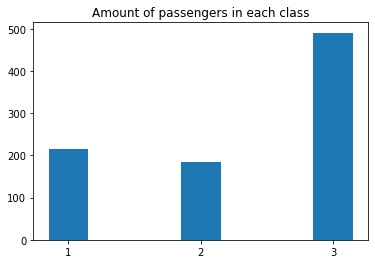

In [29]:
# a bar chart for pclass
plt.hist(titanic_train["Pclass"], bins = np.arange(1,5), align = "left",
        rwidth = 0.3)
plt.title("Amount of passengers in each class")
plt.xticks([1, 2, 3])
plt.show()

### Histograms
Difference between histograms and bar charts: https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/?sh=65ed3306d775

- Histograms plot binned quantitative data while bar charts plot categorical data.
- Bars can be reordered in bar charts but not in histograms.
- Values in bar charts are given by the length of the bar while values in histograms are given by areas.

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

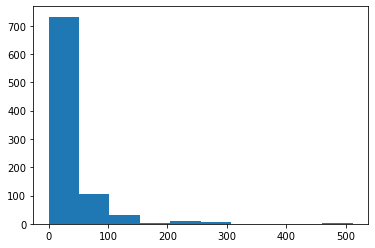

In [72]:
plt.hist(titanic_train["Fare"])

### Density Plots

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


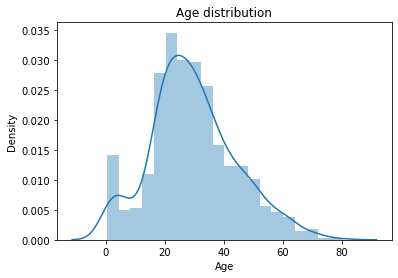

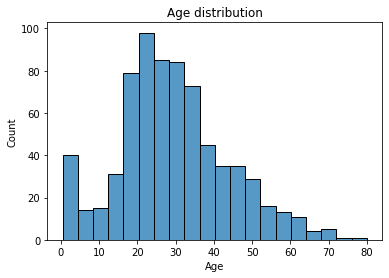

In [41]:
# age distribution - density plot in seaborn
sns.distplot(titanic_train["Age"]).set_title("Age distribution")
plt.show()
sns.histplot(titanic_train["Age"]).set_title("Age distribution")
plt.show()

### Violin Plots, univariate

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


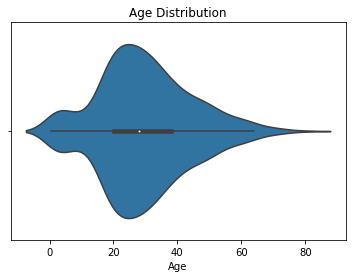

In [74]:
sns.violinplot(titanic_train["Age"] ).set_title("Age Distribution")
plt.show()

### Scatter Plots

<AxesSubplot:xlabel='Age', ylabel='Fare'>

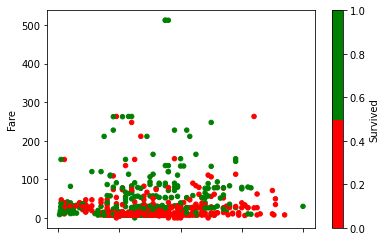

In [17]:
 # scatter plots
import matplotlib.colors
cmap = colors.ListedColormap(["red", "green"])
titanic_train.plot.scatter(x = "Age", y = "Fare", c = "Survived", colormap = cmap)

## Bivariate analysis
Investigating correlations between any two variables. Here, heatmaps, stacked barcharts and segregated bar plots.

### Violin Plots, bivariate

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


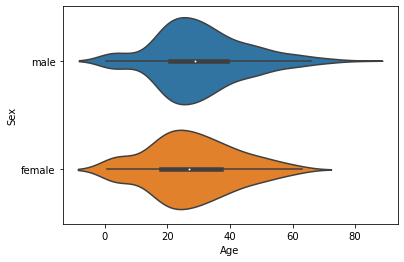

In [73]:
sns.violinplot("Age", "Sex", data = titanic_train)
plt.show()

## Multi-Plot Grids
Plots conditional relationships

invalid value encountered in greater_equal
invalid value encountered in less_equal


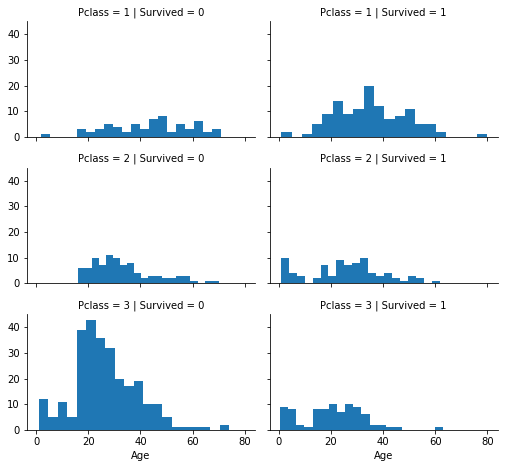

In [48]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

Using the barplot function without specifying `order` is likely to produce an incorrect plot.


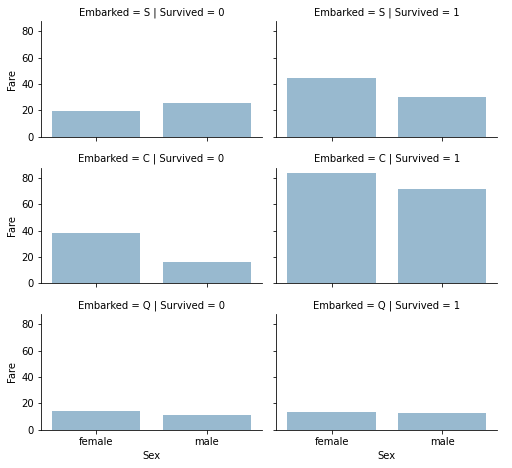

In [51]:
grid = sns.FacetGrid(titanic_train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

# Heatmaps

Both of these are measures of association between two nominal variables, giving a value between 0 and 1.

- Cramers V: It is a measure of relationship between two categorical features, similar to correlation, which is only defined for continous features. The relationship is called association. For example we can see that there is an association between van17 and the ECU. (https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

- Theils U: Similar to Cramer's V, it's a measure of relationship between categorical data. For example, we already know there is an association between van17 and ECU. But Theils U shows us, that when we know the van17, we can conclude the ECU. But when we know the the ECU, we cannot conclude the van17. That's why Theils U gives us something what is called an assymmetric association. (https://en.wikipedia.org/wiki/Uncertainty_coefficient)


<AxesSubplot:>

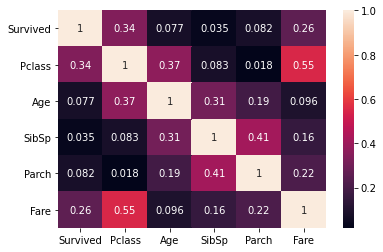

In [114]:
sns.heatmap(titanic_train.drop(["PassengerId"], axis = 1, inplace = False).corr().abs(), annot = True)

<AxesSubplot:>

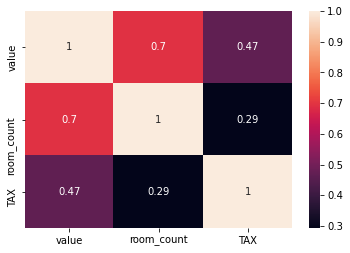

In [112]:
#plt.figure(figsize = (20, 10))
#sns.heatmap(housing.corr().abs(), annot = True)
sns.heatmap(housing[["value", "room_count", "TAX"]].corr().abs(), annot=True)

## Stacked Bar Charts

<AxesSubplot:xlabel='Sex'>

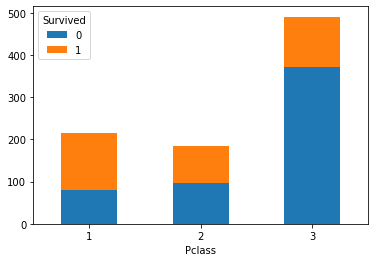

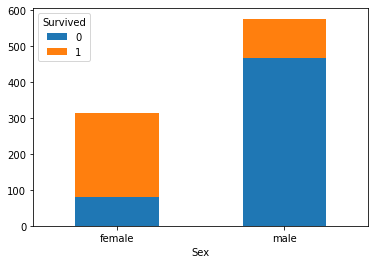

In [87]:
# stacked bar charts
# distribution of survival among gender
# distribution of survival among pclass

# distribution of dtc_type (F/I) among sgbd (GS.../ GS...)

titanic_train.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True, rot = 0)
titanic_train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True, rot = 0)

In [45]:
#### IRRELEVANT TO TASKFORCE. here to ensure execution of the code

# preprocessing. here we do some clever imputation
#titanic_train["Salutations"] = titanic_train["Name"].str.extract(r'([A-Z]{1}[a-z]+\.)')
#print(titanic_train[titanic_train["Salutations"] == "Miss."]["Age"].median())
def impute_missing_vals(df_train):
    df_train["Salutations"] = df_train["Name"].str.extract(r'([A-Z]{1}[a-z]+\.)')
    master = (df_train["Salutations"] == "Master.")
    miss = (df_train["Salutations"] == "Miss.") | (df_train["Salutations"] == "Ms.") | (df_train["Salutations"] == "Mlle.")
    mister = (df_train["Salutations"] == "Mr.")
    missus = (df_train["Salutations"] == "Mrs.") | (df_train["Salutations"] == "Mme.")
    df_train["Title"] = "Others"
    df_train["Title"][master] = "Master"
    df_train["Title"][miss] = "Miss"
    df_train["Title"][mister] = "Mister"
    df_train["Title"][missus] = "Missus"
    df_train["Age"] = df_train.groupby("Title")["Age"].apply(lambda x: x.fillna(x.median()))
    
    # dealing with missing values in cabin and embarking
    df_train["Cabin"] = df_train["Cabin"].str.extract(r'([A-Z]{1})').fillna('Z')
    df_train["Embarked"] = df_train["Embarked"].fillna('S')
    df_train.drop(["Name", "Salutations", "Ticket"], axis=1, inplace=True) #  name and ticket are not 
    # important for prediction at all and salutation is now redundant
    df_train.drop(["PassengerId", "Survived", "SibSp", "Parch", "Family"], axis=1, inplace=True)

impute_missing_vals(titanic_train)
impute_missing_vals(titanic_test)

C:\Users\Q514216\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Q514216\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Q514216\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

## Handling NAN's

In [47]:
# checking for na's
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [138]:
# checking for nan's:

# nan's count across all columns

print('Training data nulls')
print(titanic_train.isnull().sum())
print('='*60)
print('Testing data nulls')
print(titanic_test.isnull().sum())

Training data nulls
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Testing data nulls
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Imputing missing values

In [129]:
# using this class, you can automatically impute both the missing categorical and numeric data
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
    
xt = DataFrameImputer().fit_transform(titanic_train)

In [148]:
titanic_train.fillna(titanic_train.mean(), inplace = True)
# fills missing numeric values with mean. median or anything else can be used.
titanic_train.fillna(titanic_train.mode().iloc[0], inplace = True)
# fills in the most frequent value. used for imputing categorical variables.

In [149]:
print(titanic_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Dropping missing values

In [ ]:
def drop_nans(df, thresh=0.6):
    df = df.dropna(axis='columns', thresh=round(len(df) * thresh))  # thresh: required non-na values percentage
    return df

# Handling categorical variables: Dummy Encoding

In [83]:
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [150]:
# preprocessing: Dummies
y = titanic_train.Survived

X = pd.get_dummies(titanic_train.drop(["Name", "Cabin", "Ticket"], axis = 1))
X.drop(["PassengerId", "Survived"], axis=1, inplace=True)
#X_test = pd.get_dummies(titanic_test)
#X_test.drop(["PassengerId", "Survived"], axis=1, inplace=True)

In [152]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

# Additional plots

## Line Plots

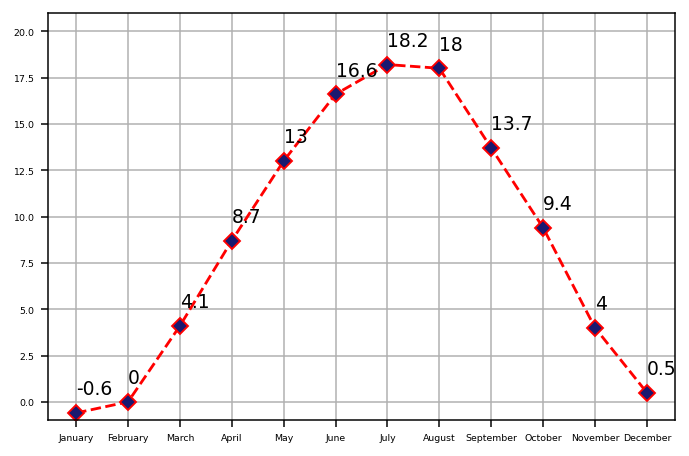

In [91]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
temps = [-0.6, 0, 4.1, 8.7, 13, 16.6, 18.2, 18, 13.7, 9.4, 4, 0.5]

# this adds annotations
ax = plt.figure().add_subplot(111)
for i,j in zip(months, temps):
    ax.annotate(str(j),xy=(i,j + 1))
ax.set_ylim(-1, 21)

plt.plot(months, temps, linestyle = "--", marker = "D", color = "red", markerfacecolor = "midnightblue")
plt.grid()
plt.rcParams["figure.dpi"] = 135
plt.tick_params(labelsize=5)

## Scatter Plots

In [ ]:
adult = pd.read_csv("data/adult/adult.csv")

def target_column(x): 
    if "<=50K" == x:
        return 0
    else:
        return 1
adult["target"] = adult["income"].apply(lambda x : target_column(x))

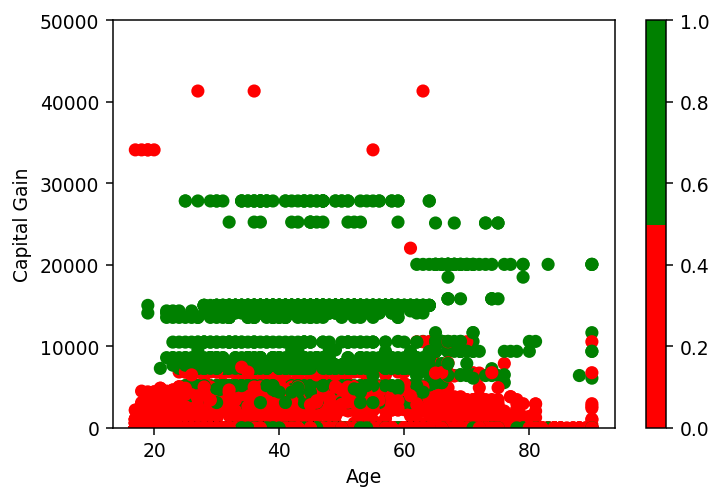

In [92]:
# scatter plot
# x - hours per week
# y - age
# color - income
plt.scatter(adult["age"], adult["capital-gain"], c = adult["target"], cmap = cmap)
plt.ylim(0, 50000)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Capital Gain")
plt.show()

# the c param needs to be an array of colors. that somehow corresponds to the target variable

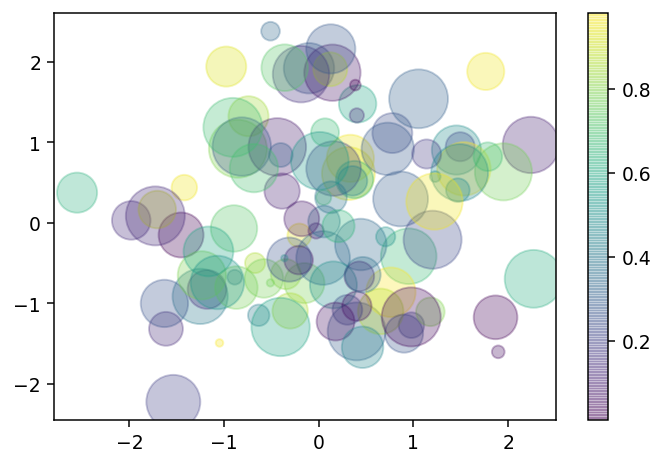

In [93]:
# creating some random data for the plot and setting up plot hyperparameters
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

# the scatter plot
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

# Model training: ML

In [154]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## k-Neigbors Model

In [155]:
# create a model. use some of the ones used in the kernels, 1-2 max
# knn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_test, pred_knn))
# 0.77...

0.6983240223463687


## Random Forest

In [156]:
# create a random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
print(metrics.accuracy_score(y_test, predictions_rf))
# 0.81...

0.8379888268156425


## XGBoost. Gradient Boosting

https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97

A gradient-boosting based machine learning ensemble model. It's a random forest where the model focuses on where the individual models (i.e. decision trees) went wrong. Usually more accurate than a simple random forest.

In [157]:
# gradient boost
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(nthread=1, colsample_bytree=0.6, 
                                   learning_rate=0.03, max_depth=5, 
                                   min_child_weight=2, n_estimators=1000, subsample=0.8)
xgboost_classifier.fit(X_train, y_train)
preds_xgboost = xgboost_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, preds_xgboost))
print(metrics.confusion_matrix(y_test, preds_xgboost))
# 0.849...

0.8435754189944135
[[99 15]
 [13 52]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgboost_classifier, X = X_train, y = y_train, cv = 5);
# the semicolon suppresses the output of the particular line
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Catboost

https://papers.nips.cc/paper/2018/file/14491b756b3a51daac41c24863285549-Paper.pdf

In [158]:
%%capture
# this suppresses cell output, catboost has some weird output. line magic has to be the first line in the cell. even comments can only go after
# line magic, otherwise it won't work.
# catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=200,
                          learning_rate=0.03,
                          depth=4)
#cat_features = [3, 8, 9, 10]
# Fit model
catboost_model.fit(X_train, y_train)
# Get predictions
preds_catboost = catboost_model.predict(X_test)

In [160]:
from IPython.utils import io
from sklearn.model_selection import cross_val_score
with io.capture_output() as captured:
    accuracies = cross_val_score(estimator = catboost_model, X = X_train, y = y_train, cv = 5)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 42.59 %
Standard Deviation: 4.86 %


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

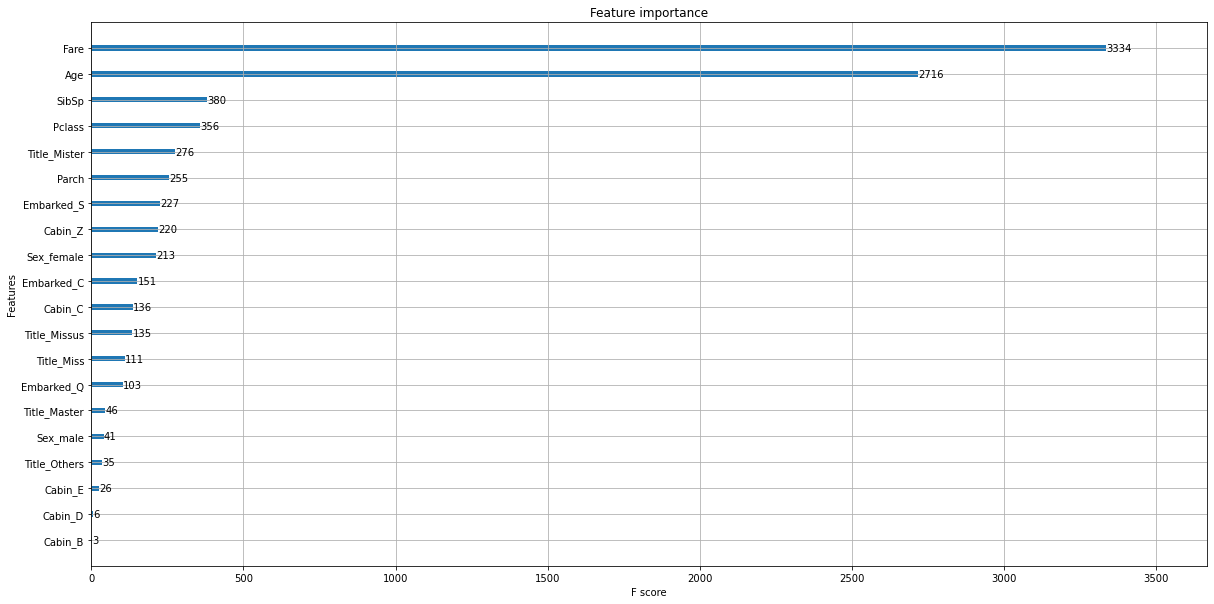

In [78]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20, 10))
plot_importance(xgboost_classifier, ax=ax)

## Grid Search
A technique for quickly testing different hyperparameter combinations.

In [81]:
# grid search for better prediction accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {
        'min_child_weight': [1, 2],
        'learning_rate': [0.2, 0.3, 0.02, 0.03],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6],
        'n_estimators': [100, 500, 750, 1000]
}

grid = GridSearchCV(estimator=xgboost_classifier, param_grid=params, scoring='accuracy', n_jobs=4, cv=5, verbose=3)
grid.fit(X, y)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   39.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1228 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1644 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 2124 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 2668 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 3276 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 3948 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 4320 out of 4320 | elapsed:  7.0min finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

 Best score:
0.8507312786391312

 Best parameters:
{'colsample_bytree': 0.6, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 1000, 'subsample': 0.8}


# LIME
https://atc.bmwgroup.net/confluence/display/MUVEA/SHAP+vs.+LIME

In [161]:
# evaluate using LIME

# create the explainer
# only accepts training data as a numpy array
# feature names and class names should be lists and should be of this type to be json convertable
# (json convertable for the LIME notebook)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), 
                                                   feature_names=list(X_train.columns.astype("U")), 
                                                   class_names = list(np.unique(y_train).astype("U")),
                                                   mode = "classification")

In [162]:
exp = explainer.explain_instance(X_test.to_numpy()[0],
                                 xgboost_classifier.predict_proba, num_features=5)

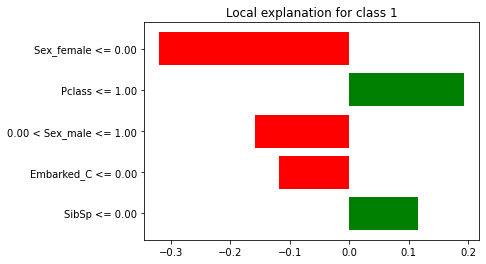

In [163]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [254]:
exp.show_in_notebook(show_table=True, show_all=False)

In [256]:
exp.show_in_notebook(show_table=True, show_all=True)

In [222]:
exp = exp.as_list()
print(exp)

[('Sex_female <= 0.00', -0.24176577510534428), ('0.00 < Title_Mister <= 1.00', -0.21047300489244275), ('Pclass <= 2.00', 0.19195060833238653), ('Age > 35.00', -0.1854164955679663), ('14.50 < Fare <= 30.77', -0.0899341663686518)]


# SHAP

In [268]:
# evaluate using SHAP (maybe)
shap_explainer = shap.TreeExplainer(xgboost_classifier)
shap_values = shap_explainer.shap_values(X_train)

In [269]:
# load JS visualization code to notebook
shap.initjs()

shap.force_plot(shap_explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

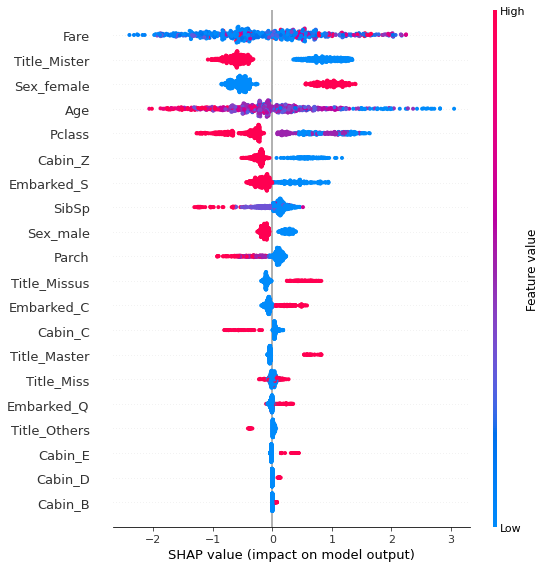

In [270]:
shap.summary_plot(shap_values, X_train)